# Actividades de clase, semanas 4, 5 y 6.

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

Text(0.5, 1.0, 'Reflexión vertical')

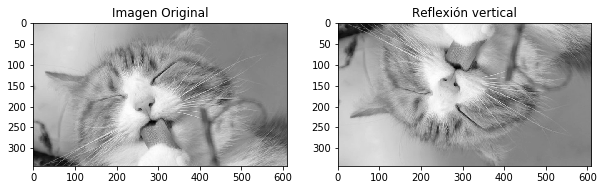

In [31]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
img = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas,columnas = img.shape

#REFLEXION
#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(img,matriz_afin_ref_y,(columnas,filas))

fig = plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical")


[[-1.0000000e+00  1.2246468e-16  6.1000000e+02]
 [-1.2246468e-16 -1.0000000e+00  3.4300000e+02]]


Text(0.5, 1.0, 'Imagen Rotada 180°')

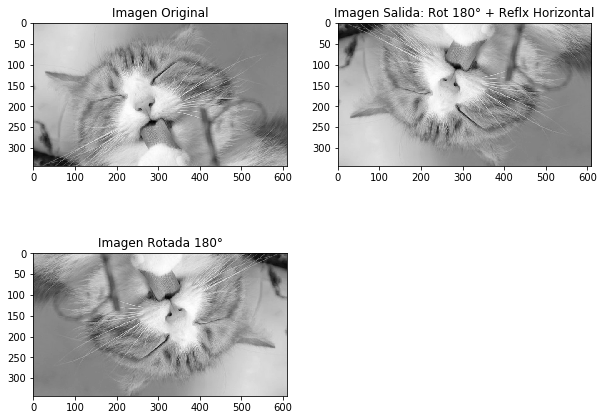

In [32]:
#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)
#Mostrar la matriz calculada
print(matriz_afin_rot)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(img,matriz_afin_rot,(columnas,filas))

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))


#Figura 1x2 para mostrar imagen original y resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(3,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(3,2,2)
plt.imshow(ref_x,cmap='gray')
plt.title("Imagen Salida: Rot 180° + Reflx Horizontal");

plt.subplot(3,2,3)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Rotada 180°")




## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

Text(0.5, 1.0, 'Imagen Salida')

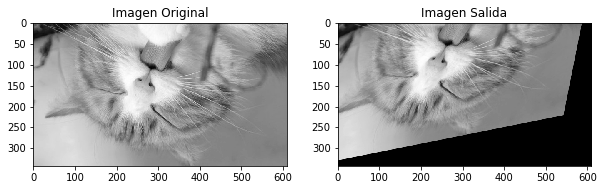

In [33]:
#Con base en la teoría, crear la matriz M de inclinación
#reemplazando los valores b y d
inc_x = -0.2
inc_y = -0.2
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída
res = cv2.warpAffine(ref_x,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(ref_x,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

Cuando se realiza la rotación en el eje x, si el incremento es positivo entonces la rotación es en sentido antihorario. Y si el incremento es negativo, como el propuesto en el ejercicio, entonces el sentido de giro es horario.
Cuando se realiza la rotación es en el eje y si el incremento es positivo entonces la rotación se percibe como hacia atrás mientras que si el incremento es negativo entonces se percibe una rotación hacia delante.

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

Text(0.5, 1.0, 'Imagen Rotada 180°')

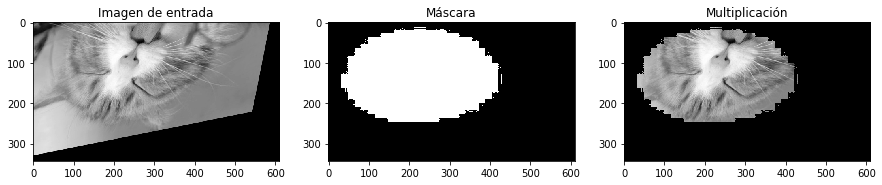

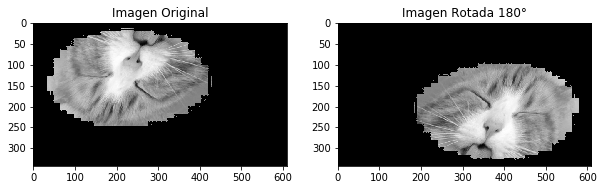

In [43]:
#Leer la imagen
img = res

#Leer la máscara y normalizarla, cambiar su tipo de dato y ajustar su tamaño
mascara = cv2.imread('res/mascara2.png',cv2.IMREAD_GRAYSCALE)/255
mascara = cv2.resize(mascara, (img.shape[1], img.shape[0])).astype(np.uint8)

#Operación multiplicar
out = cv2.multiply(img, mascara)

#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(out,matriz_afin_rot,(columnas,filas))

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))


fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Multiplicación')
ax1.imshow(img, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')

fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(out,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(rot, cmap='gray')
plt.title("Imagen Rotada 180°")


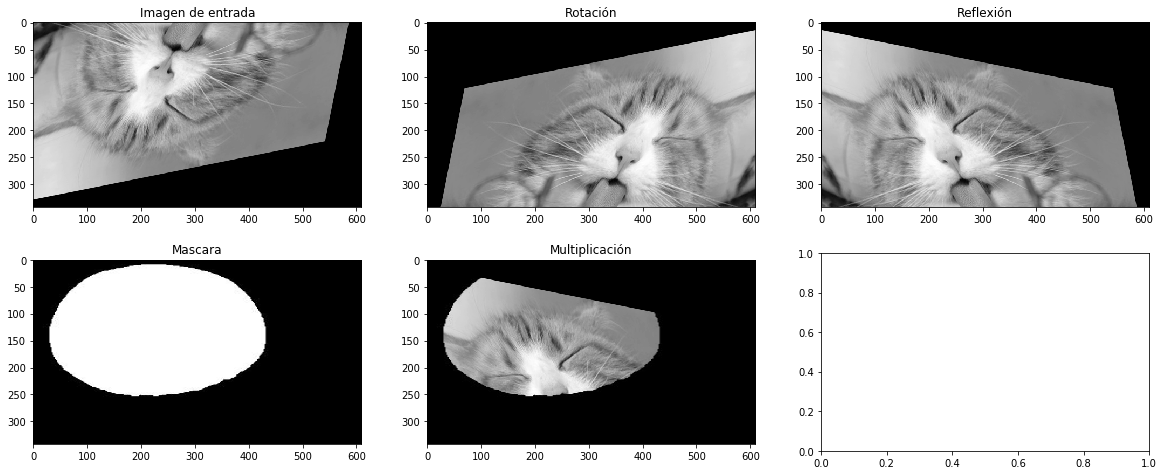

In [44]:

#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(res,matriz_afin_rot,(columnas,filas))

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])
#Aplicar la matriz de transformación de reflexión X a la imagen
ref_x = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))

#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara2 = cv2.imread('res/mascara2.png',cv2.IMREAD_GRAYSCALE)/255
#Ajustar el tamaño de la máscara al de la img
mascara2 = cv2.resize(mascara2, (ref_x.shape[1], res.shape[0]))
#out = img * np.logical_and(img, np.logical_not(mascara))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out2 = ref_x * mascara2
out2 = out2/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND

#Figura 1x para mostrar imagen de entrada, máscara, la multiplicación, la rotacion y la reflexion
fig, ([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3, figsize=(20, 8))
ax1.set_title('Imagen de entrada')
ax2.set_title('Rotación')
ax3.set_title('Reflexión')
ax4.set_title('Mascara')
ax5.set_title('Multiplicación')

ax1.imshow(res, cmap='gray')
ax2.imshow(rot, cmap='gray')
ax3.imshow(ref_x, cmap='gray')
ax4.imshow(mascara2, cmap='gray')
ax5.imshow(out2, cmap='gray')



Realizando el ejercicio número 3, podemos ver la diferencia en la suavidad de la máscara leída utilizando la multiplicación de imágenes tanto con la operacion **multiply de OPENCV** como la **operación AND** vista en clase, Siendo más suaves los bordes obtenidos con la operación AND.

Como vemos en la última ejecución, si rotamos primero la imagen y aplicamos luego la multiplicción con la máscara2.png **el resultado es completamente diferente** ya que la imagen del gato al rotarla (estando inclinada previamente), queda con los pixeles que componen al gato en su mayoría fuera del alcance de la parte de la máscara que se une con la imagen original.

Es decir, no son el mismo resultado las dos operacione ya que la mascara se aplica en diferente angulo de la imagen en ambos casos, por eso en el primero se puede apreciar todo el hocico del gato, mientras en el segundo caso solo se alcanza a tener  los ojos, orejas y parte de la nariz. Por tanto, el orden en el que se apliquen las transformaciones afecta el resultado final.

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:79: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


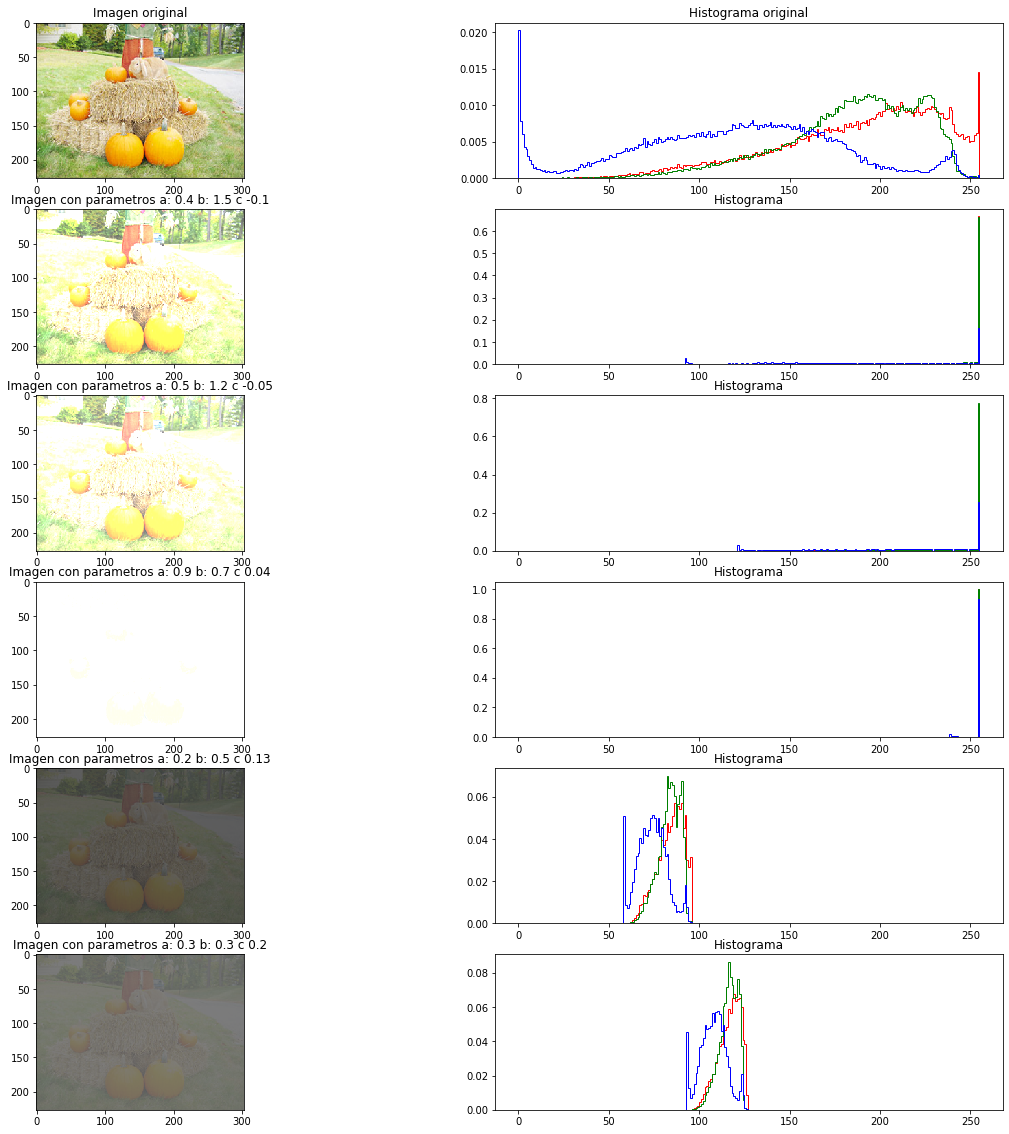

In [45]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en RGB
#img = cv2.cvtColor(cv2.imread('res/calabazas.png'), cv2.COLOR_BGR2RGB)

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (exponencial)
def non_linear_exponencial(img, a, b, c):
    
    #Crear copia de la imagen con datos flotantes dado que se normalizarán
    img_copy = img.astype(np.float32)/255.0
    
    #Una exponencial tiene la forma a*exp(bx + c) , donde x es la imagen de entrada
    #A partir de la imagen, generar bx
    res_b = cv2.multiply(img_copy,b)
    #sumar bx + c
    res_c = cv2.add(res_b,c)
    #generar exp(bx+c)
    res_exp = cv2.exp(res_c)
    #generar a*exp(bx+c)
    res = cv2.multiply(a,res_exp)
    
    
    #Asegurar que los datos queden entre 0 y 255 y regresar al dato uint8
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/calabazas.png'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,b, c (args)
a = [0.1,0.4,0.5,0.9,0.2,0.3]
b = [2.5,1.5,1.2,0.7,0.5,0.3]
c = [-0.5,-0.1,-0.05,0.04,0.13,0.2]

res=np.zeros((7,img.shape[0],img.shape[1],img.shape[2]), np.uint8)

#Aplicar la transformación exponencial sobre la imagen de entrada 
for i in range  (6):
    res[i] = apply_f_on_rgb(img, non_linear_exponencial, [a[i], b[i], c[i]])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(6,2, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

for j in range (1,6):
    arreglo_plots[j,0].set_title('Imagen con parametros a: '+ str(a[j]) + ' b: ' + str(b[j]) + ' c '+ str(c[j]) )
    arreglo_plots[j,0].imshow(res[j], cmap="gray")
    arreglo_plots[j,1].set_title('Histograma')
    for i,col in enumerate(colors):
        img_array_i = res[j,:,:,i].ravel()
        arreglo_plots[j,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),normed=True, color=colors[i])


    


## Conclusión:

Del anterior ejercico se puede concluir que si a crece, aunmenta el brillo de la imagen y este parametro tiene mas peso que b. Si c es positivo esto va a causar un aspecto oscuro a la imagen que posiblemente tenga que ver con el contraste. Tambien se pudo observar que b tiene un peso sobre el ancho de las grafica (que tanto se expande el espectro de cada color (rgb) en la grafica), ya que al reducirlo las badas tambien se encogieron.

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in log
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anacond

<Figure size 432x288 with 0 Axes>

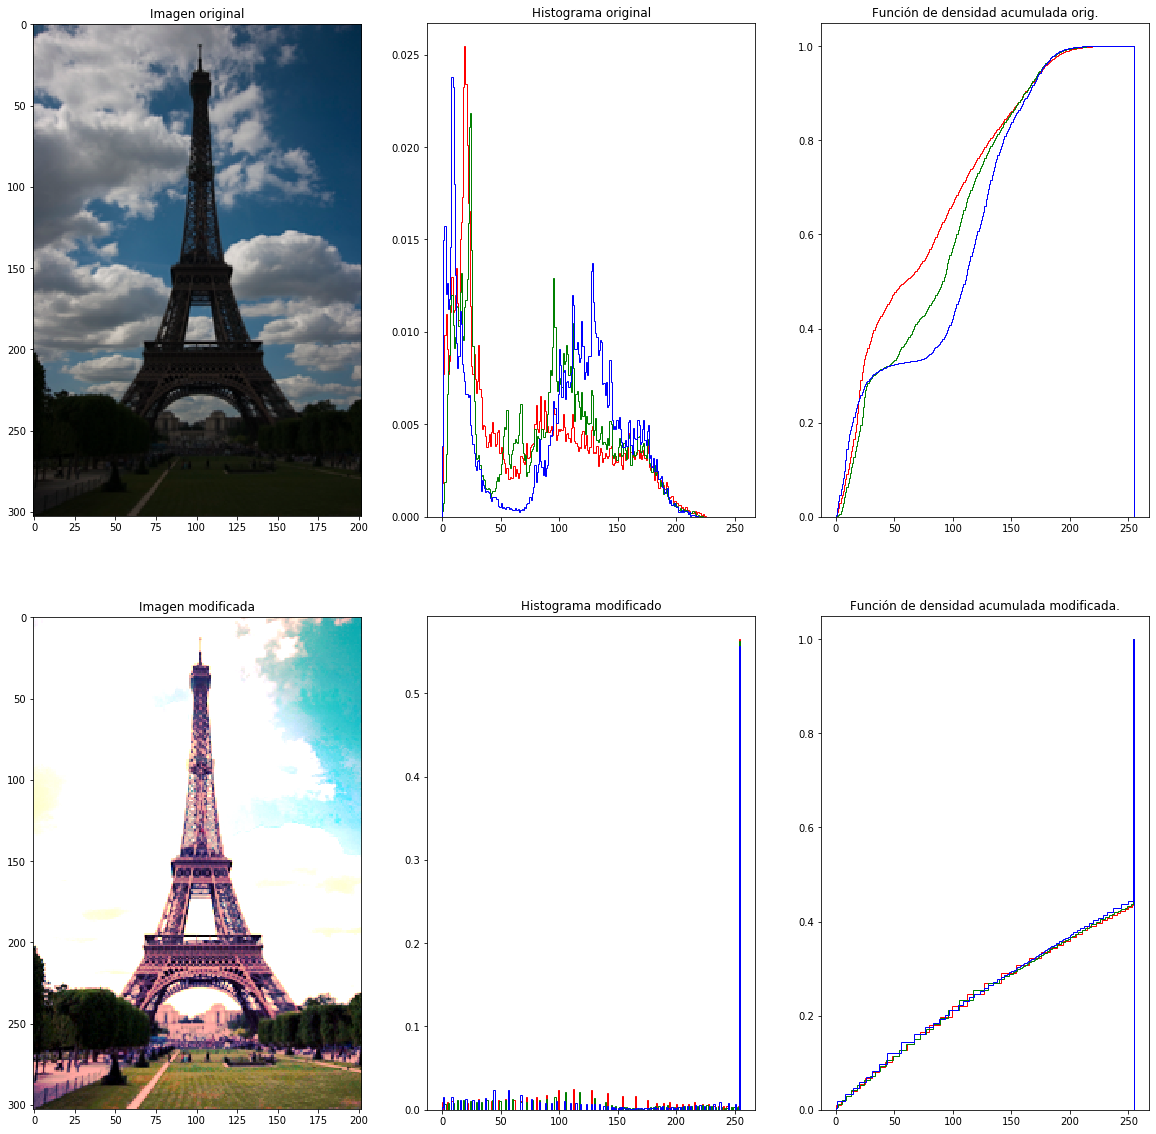

In [46]:
# Ecualizador Exponencial


#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt


#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        #se escoge un alpha de 0.5
        res[img == g] = - gmin - (1/0.5)*np.log(1-cdf[g])*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anaconda3\envs\Vision\lib\site-packages\ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\BocanegraMartinez\Anacond

<Figure size 432x288 with 0 Axes>

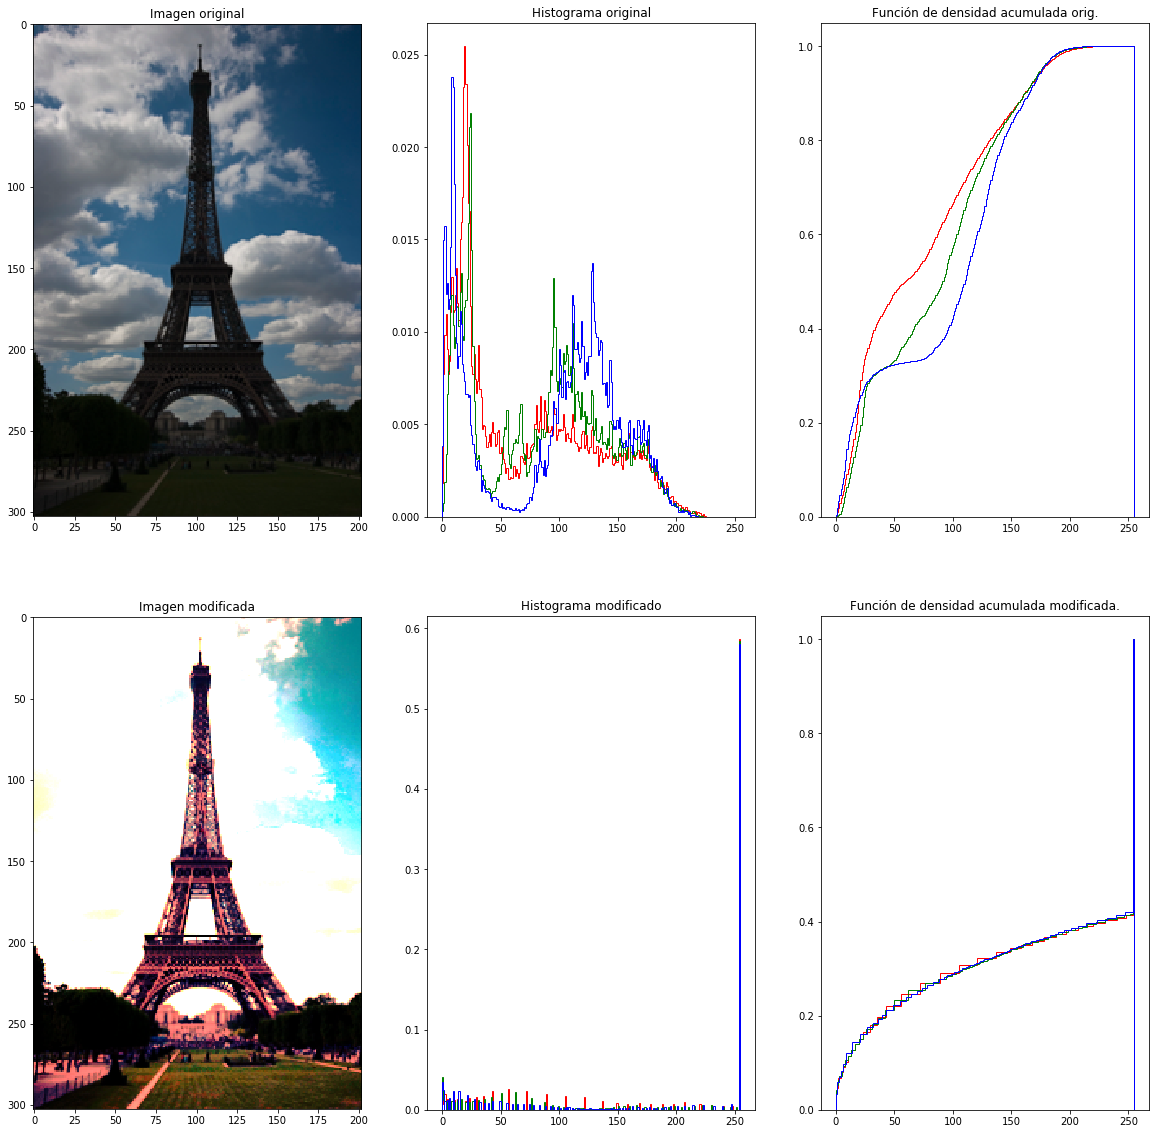

In [47]:
# Ecualizador Rayleigh

#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt


#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        #se escoge un alpha de 1
        dentro_raiz = -2*(1**2)*np.log(1-cdf[g])
        res[img == g] = gmin + (dentro_raiz**2) * (gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

## Conclusión:
El Ecualizador Exponencial tiende a ser un poco mas suave que el Ecualizador Rayleigh, esto se puede apreciar tanto en la imagen (ya que en el Ecualizador Rayleigh los tonos oscuros se ven más scuros y los claros, más claros, es decir, hay mayor contraste que en el Exponencial) y en la forma de la grafica de la funcion de densidad (pues la curva del Ecualizador Exponencial tiene un crecimiento mas suave, una tasa de cambio mas constante en comparacion con el Ecualizador Rayleigh, el cual al principio tiene mayor pendiente que se va suavizando a medida que la grafica avanza)



## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

c:\users\nelsonfelipebarcoben\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


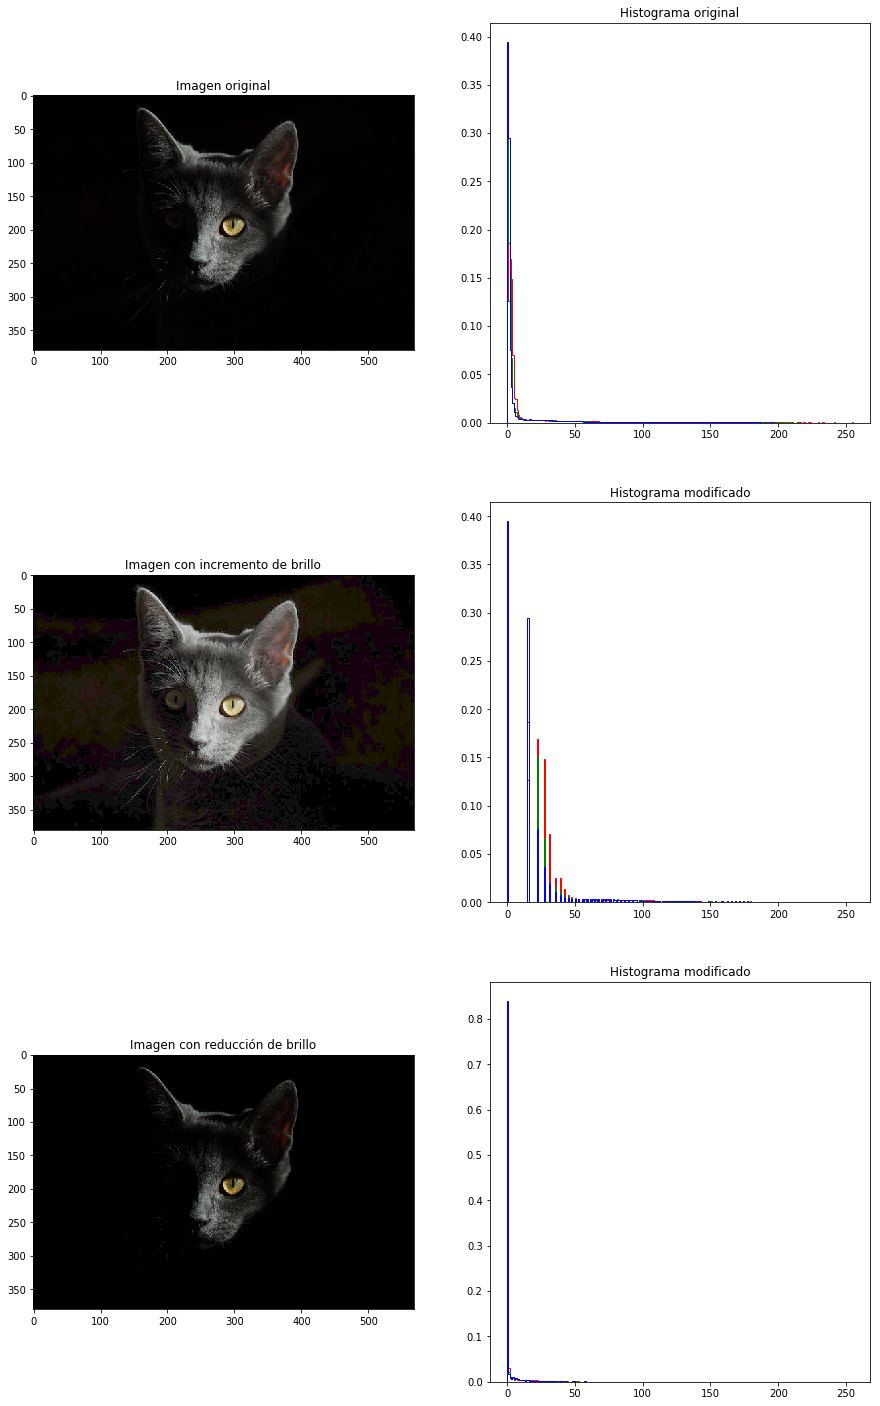

In [9]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5 # a mayor gamma menor sera el brillo

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

## Conclusión:

Gamma es inversamente proporcional al brillo de la imagen, es decir, a mayor gamma menos brillo tendra la imagen. Por lo tanto, la imagen con mas brillo (imagen con incremento de brillo) es propia de un gamma entrr 0<gamma<1, mas especificmaente gamma=0.5; mientras que la imagen con menos brillo (imagen con reducción de brillo) es  propia de un gamma>1, mas especificamente gamma=1.5

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

El resultado de aplicar la convolución en img(1,1) es: 253


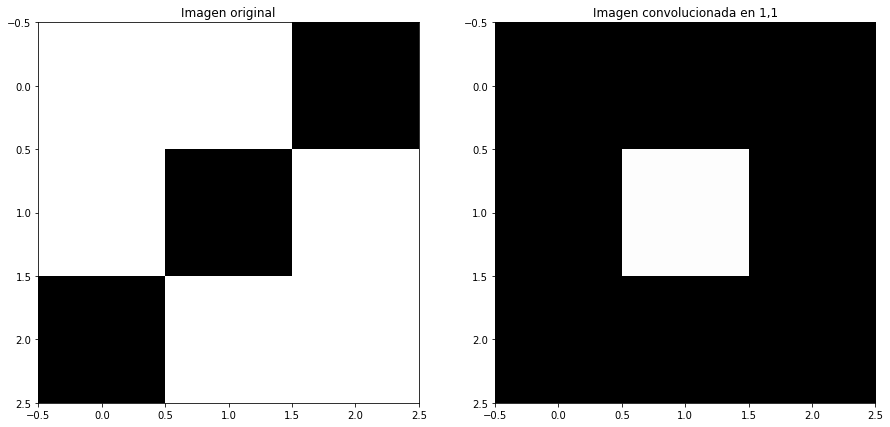

In [16]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Imagen de entrada, creada artificialmente
img = np.array([[255,255,0],
              [255,0,255],
              [0,255,255]], dtype=np.uint8)

#Posición (x,y)
x = 1
y = 1

#Máscara de convolución
w = np.array([[1/2,1/2,1/2],
              [1/2,1/2,1/2],
              [1/2,1/2,1/2]], dtype=np.float64)

k = 1 #el radio del kernel

#Crear una matriz de ceros del mismo tamaño de la imagen de entrada, datos flotantes
res = np.zeros(img.shape, dtype=np.float64)

#Recorrer todos los valores i,j de la imagen, en el intervalo del radio del kernel
for i in range(-k, k+1):
    for j in range(-k, k+1):
        #Resultado de la convolución en la posición 1,1
        res[1][1] += img[x+i][y+j] * w[k+i][k+j]
        
#Volver al tipo de dato uint8
res=res.astype(np.uint8)

print("El resultado de aplicar la convolución en img(1,1) es:", res[1][1])

#Generar subplot 1x2 para mostrar imagen original y convolucionada en 1,1
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada en 1,1')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

## Conclusión:
Como solo se haceconvolusion sobre (1,1) este es el unico que tiene un valor diferente a 0. este valor, este es el promedio del computo del valor del pixel en un punto, producto la mascar en dicho punto. Para este caso indica que hay mas valores blancos que negros por que la mascar aarroojo como resultado en 1,1 un valor muy cercano a 255